In [17]:
import pandas as pd

In [18]:

# URLs dos dados de treino e teste
url_train = 'https://github.com/Magno-Rodrigues/kaggle/blob/main/titanic_kaggle/train.csv?raw=true'
url_test  = 'https://github.com/Magno-Rodrigues/kaggle/blob/main/titanic_kaggle/test.csv?raw=true'

# Carregar dados de treino e teste
data_train = pd.read_csv(url_train)
data_test  = pd.read_csv(url_test)

test_ids = data_test["PassengerId"]

In [19]:
display(data_train.info(),data_train.head(), data_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# Extrair título do nome
data_train['Title'] = data_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data_test['Title'] = data_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Verificar a distribuição de títulos
display(data_train['Title'].value_counts())

# Mapear títulos raros para 'Rare'
rare_titles = data_train['Title'].value_counts()[data_train['Title'].value_counts() < 10].index
data_train['Title'] = data_train['Title'].replace(rare_titles, 'Rare')
data_test['Title'] = data_test['Title'].replace(rare_titles, 'Rare')

# Mapear os títulos para números
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
data_train['Title'] = data_train['Title'].map(title_mapping)
data_test['Title'] = data_test['Title'].map(title_mapping)

# Verificar o dataframe atualizado
display(data_train.head(100))

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,3


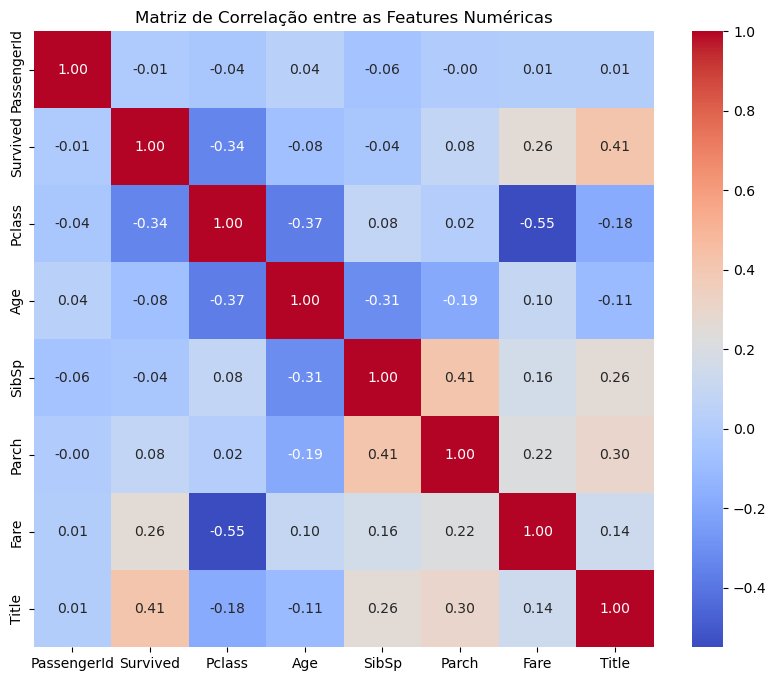

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Selecionar apenas features numéricas e relevantes para a matriz de correlação
numeric_features = data_train.select_dtypes(include=['int64', 'float64'])

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação entre as Features Numéricas')
plt.show()

 - Criar uma função para limpar os dados. Essa função não da para alcançar um score alto, mas da para ter uma ideia mais simples.

In [26]:
## função para limpar o dataset data_train
def clean (data):
# Ticket (checar depois, categorizar), Cabin - retirado só para simplificar
# (é bom saber a localização no navio, converter o NaN para Unknow e os outros para
# categorias númericas representando cada local no navio - embaixo, meio, encima),
# Name (o nome pode trazer informações como títulos Mr., Mrs. Dr., que podem ser tranformados
# em categorias numéricas, ajudando em média de idade por exemplo)
    data = data_train.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1) 
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
# prencher campos vazios com a mediana é o jeito mais fácil, por exemplo Age, seria melhor usar
# a coluna name e tentar prever uma media de idades usando os títulos (Mr., Mrs. Miss, Master, etc.)
        data_train[col].fillna(data_train[col].median(), inplace=True) 
        
    data_train.Embarked.fillna("U", inplace=True)
    return data_train

data_train = clean(data_train)
data_test  = clean(data_test)    

In [27]:
# Podemos ver aqui que não há mais valores nulos 
display(data_train.info(),data_train.head(), data_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col]  = le.transform(data_test[col])
    print(le.classes_)
    
display(data_train.info(),data_train.head(), data_test.head())

['female' 'male']
['C' 'Q' 'S' 'U']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


None

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,1,1.0
1,3,0,47.0,1,0,7.0000,2,3.0
2,2,1,62.0,0,0,9.6875,1,1.0
3,3,1,27.0,0,0,8.6625,2,1.0
4,3,0,22.0,1,1,12.2875,2,3.0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y = data_train["Survived"]
X = data_train.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = LogisticRegression(random_state=0, max_iter =1000).fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)

In [11]:
predictions_clf = clf.predict(X_val)
display(accuracy_score(y_val, predictions_clf))

predictions_rfc = rfc.predict(X_val)
accuracy_score(y_val, predictions_rfc)

0.7821229050279329

0.8268156424581006

In [12]:
submission_preds = rfc.predict(data_test)

In [13]:
df = pd.DataFrame({"PassengerId":test_ids.values, "Survived": submission_preds})

df.to_csv("submission.csv", index=False)

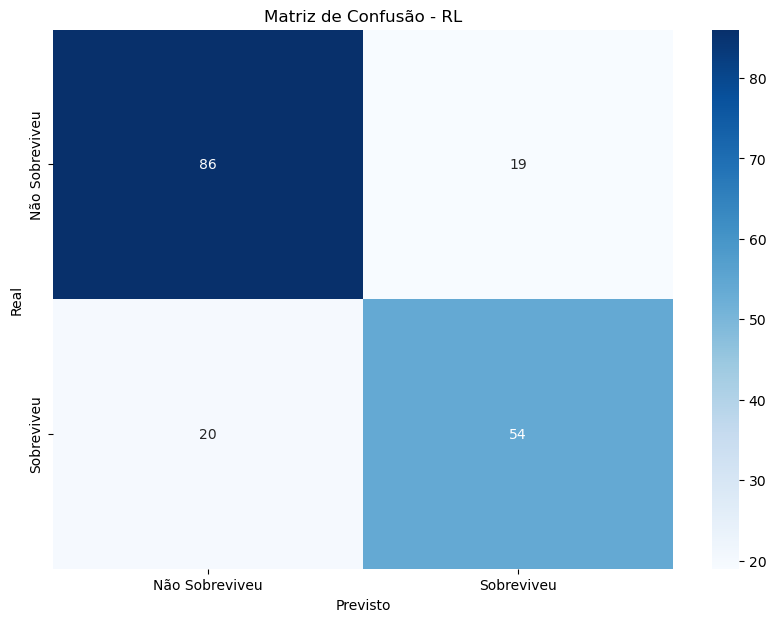

In [14]:
# Calcular a acurácia
accuracy = accuracy_score(y_val, predictions_clf)

# Exibir matriz de confusão
conf_matrix = confusion_matrix(y_val, predictions_clf)

# Exibir relatório de classificação
class_report = classification_report(y_val, predictions_clf)

accuracy, conf_matrix, class_report

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - RL')
plt.show()

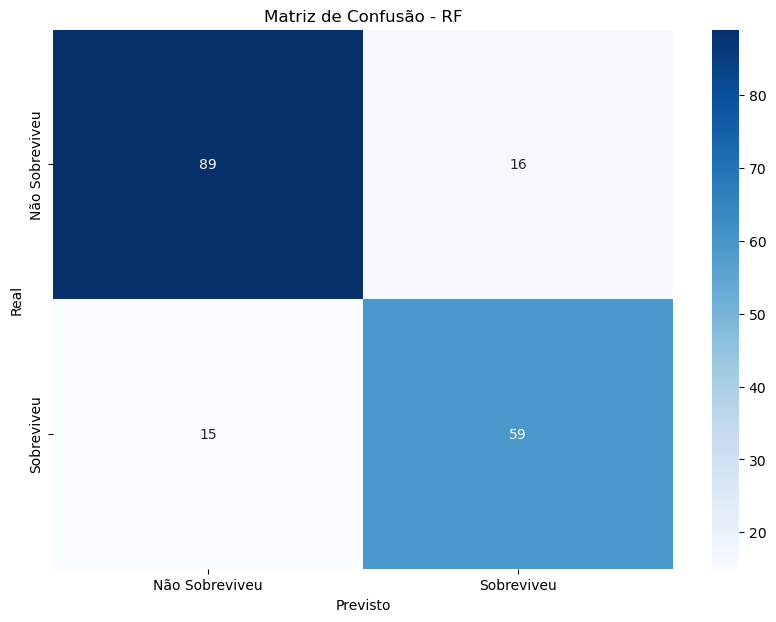

In [15]:
# Calcular a acurácia
accuracy = accuracy_score(y_val, predictions_rfc)

# Exibir matriz de confusão
conf_matrix = confusion_matrix(y_val, predictions_rfc)

# Exibir relatório de classificação
class_report = classification_report(y_val, predictions_rfc)

accuracy, conf_matrix, class_report

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - RF')
plt.show()